# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data = data, index = labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.info
df.describe

<bound method DataFrame.describe of    age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1>

```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
df.head(4)
df.iloc[0:3]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df.loc[:,'age':'animal']

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.loc[['c','d','g'],['animal','age']]

,animal,age
c,snake,0.5
d,dog,NaN
g,snake,4.5


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df.loc[df['visits'] >= 3]

,age,animal,priority,visits
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,2.0,cat,no,3


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df.loc[df['age'] != df['age']]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df.loc[(df['age'] < 3) & (df['animal'] == 'cat')]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df.loc[(df['age'] <= 4) & (df['age'] >= 2)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f','age'] = 1.5


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print(df['visits'].sum())
print(np.sum(df['visits']))

19
19


```Calculate the mean age for each different animal in `df`.```

In [0]:
df.groupby(['animal']).mean()

,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
data1 = {'animal': ['cat'],
        'age': [100],
        'visits': [10],
        'priority': ['yes']}
labels1 = ['k']

df1 = pd.DataFrame(data = data1, index = labels1)

df = df.append(df1)

df = df.drop(['k'])

df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Count the number of each type of animal in `df`.```

In [0]:
df.groupby(['animal']).size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df1 = df.sort_values(by=['age'], ascending=False)
df1
df2 = df.sort_values(by=['visits'])
df2

,age,animal,priority,visits
a,2.5,cat,yes,1
g,4.5,snake,no,1
h,NaN,cat,yes,1
j,3.0,dog,no,1
c,0.5,snake,no,2
e,5.0,dog,no,2
i,7.0,dog,no,2
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,1.5,cat,no,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df.replace({'yes':True, 'no':False})

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df.replace({'snake':'python'})

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,python,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,python,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
table = pd.pivot_table(df, index = ['animal'], columns = ['visits'], values = 'age', aggfunc = np.mean)
table

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
data3 = {'age': [np.random.randint(20,65) for i in range(1000)],
        'skill': np.clip([np.random.normal(loc = 0.5, scale = 0.3) for i in range(1000)],0,1),
        'height': [np.round(np.random.uniform(1.5,2.0), decimals = 2) for i in range(1000)]}
labels3 = [i for i in range(1,1001)]

df3 = pd.DataFrame(data = data3, index = labels3)
df3

,age,height,skill
1,43,1.62,0.000000
2,44,1.68,1.000000
3,27,1.58,0.831411
4,42,1.95,0.000000
5,53,1.98,0.416228
6,41,1.85,0.000000
7,21,1.72,0.761183
8,47,1.73,0.738716
9,40,1.66,0.010074
10,64,1.76,0.387467


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
df3['salary'] = 1000*((((df3.age)**2)/1000 + 1.7*df3.skill + 0.4*np.exp(-(df3.height-1.7)**2)))
df3

,age,height,skill,salary
1,43,1.62,0.000000,2246.448175
2,44,1.68,1.000000,4035.840032
3,27,1.58,0.831411,2536.679719
4,42,1.95,0.000000,2139.765225
5,53,1.98,0.416228,3886.425571
6,41,1.85,0.000000,2072.100495
7,21,1.72,0.761183,2134.851458
8,47,1.73,0.738716,3864.457884
9,40,1.66,0.010074,2016.486203
10,64,1.76,0.387467,5153.256116


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
decades = df3.groupby(df3['age']//10)
print(decades.size())
print(decades.mean())
print(decades['height'].max())

ages = df3.groupby(df3['age'])
print(ages.size())
print(ages.mean())
print(ages['height'].max())

age
2    216
3    222
4    244
5    204
6    114
dtype: int64
           age    height     skill       salary
age                                            
2    24.699074  1.756481  0.470421  1807.679504
3    34.518018  1.743108  0.503353  2445.992973
4    44.762295  1.739795  0.498026  3251.096673
5    54.509804  1.753137  0.516122  4247.423735
6    62.122807  1.749912  0.496401  5095.638775
age
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
Name: height, dtype: float64
age
20    14
21    19
22    17
23    27
24    29
25    21
26    27
27    20
28    20
29    22
30    17
31    24
32    24
33    23
34    21
35    23
36    26
37    20
38    29
39    15
40    23
41    22
42    27
43    19
44    22
45    27
46    19
47    25
48    23
49    37
50    22
51    17
52    17
53    26
54    23
55    22
56    12
57    22
58    24
59    19
60    23
61    20
62    17
63    28
64    26
dtype: int64
       height     skill       salary
age                                 
20   1.755000  0.514352  166

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
ages = df3.groupby(df3['age'])
somePlot = ages['salary'].mean()/ages['height'].sum()

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

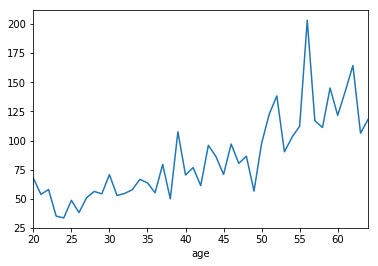

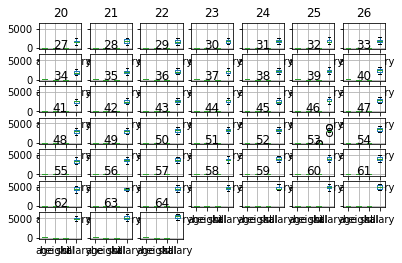

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

a = somePlot.plot()
b = ages.boxplot()

```Save the result as a csv```

In [0]:
df3.to_csv()

',age,height,skill,salary\n1,43,1.62,0.0,2246.4481745516596\n2,44,1.68,1.0,4035.8400319957345\n3,27,1.58,0.8314108504501325,2536.6797194142023\n4,42,1.95,0.0,2139.7652251253903\n5,53,1.98,0.4162280973982183,3886.425571481055\n6,41,1.85,0.0,2072.1004948773343\n7,21,1.72,0.7611831920284813,2134.8514584441523\n8,47,1.73,0.7387163069037983,3864.4578836878686\n9,40,1.66,0.010073936021516017,2016.4862029636197\n10,64,1.76,0.38746678064201806,5153.256115983828\n11,20,1.99,0.39303138318084363,1435.8890784340415\n12,33,1.64,0.15803732343254345,1756.226038727721\n13,51,1.88,0.41997133287581245,3702.1989686555066\n14,25,1.74,1.0,2724.3605117270426\n15,61,1.52,0.2006801158557071,4449.403899721327\n16,24,1.91,0.7051195671923567,2157.44657097177\n17,22,1.79,0.6336375121426894,1957.9568572848004\n18,51,1.81,0.34931311073308524,3590.02145249858\n19,23,1.9,0.3056951564330751,1432.9975415971567\n20,35,1.52,0.49741058068700533,2457.845689934534\n21,49,1.62,0.8094247735760326,4174.4702896309145\n22,42,1.5

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
pd.options.display.max_columns=50

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
print('oldest house:', df['YearBuilt'].min())

('oldest house:', 1872)


In [0]:
print('most expansive',df[df['YearBuilt'] == 1872]['SalePrice'].max())


('most expansive', 122000)


In [0]:
print('mean area',df['LotArea'].mean())


('mean area', 10516.828082191782)


In [0]:
print('50-percentile',df['LotArea'].quantile())


('50-percentile', 9478.5)


In [0]:
if (df['Fireplaces'] == 0).count() > (df['Fireplaces'] != 0).count():
  print('not having a fireplace is more common')
else:
  print('having a fireplace is more common')


having a fireplace is more common


In [0]:
print('mean price', df[df['PoolArea'] > 0]['SalePrice'].mean())


('mean price', 288138.5714285714)


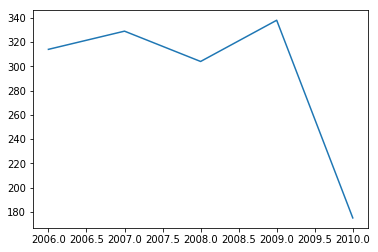

In [0]:
plt.plot(df.groupby(['YrSold']).size())


(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

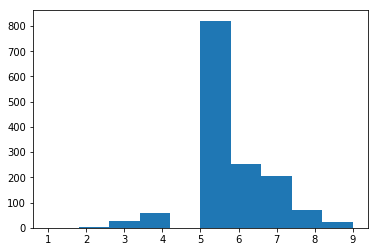

In [0]:
plt.hist(df['OverallCond'])

In [0]:
table = pd.pivot_table(df, index = ['Fireplaces'], values = 'SalePrice', aggfunc = np.mean)
table

,SalePrice
Fireplaces,
0,141331.482609
1,211843.909231
2,240588.539130
3,252000.000000


In [0]:
table = pd.pivot_table(df, index = ['Fireplaces'], values = 'YearBuilt', aggfunc = np.mean)
2019-table 

,YearBuilt
Fireplaces,
0,54.781159
1,39.150769
2,54.347826
3,38.400000


In [0]:
table = pd.pivot_table(df, index = ['Fireplaces'], values = 'FullBath', aggfunc = pd.DataFrame.nunique)
table 

,FullBath
Fireplaces,
0,4
1,4
2,4
3,2


In [0]:
groups = df[df['MSSubClass'] > 60].groupby(df['MSSubClass']%20==0)
print("min", groups['OverallQual'].min())
print("max", groups['OverallQual'].max())
print("mean", groups['OverallQual'].mean())
print("std", groups['OverallQual'].std())


('min', MSSubClass
False    3
True     4
Name: OverallQual, dtype: int64)
('max', MSSubClass
False    10
True      9
Name: OverallQual, dtype: int64)
('mean', MSSubClass
False    5.556180
True     6.389908
Name: OverallQual, dtype: float64)
('std', MSSubClass
False    1.193055
True     1.111021
Name: OverallQual, dtype: float64)


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotAreaM'] = 0.09290304*df.LotArea


In [0]:
df['SumFloors'] = df['1stFlrSF'] + df['2ndFlrSF']

In [0]:
df['GarageArea**0.5'] = df.GarageArea**0.5

In [0]:
df['LotArea / (BedroomAbvGr+1)'] = df.LotArea / (df.BedroomAbvGr+1)

In [0]:
df1 = df.groupby(['YearBuilt']).mean().reset_index().loc[:,['YearBuilt','LotArea']]
merge = pd.merge(df,df1,on = 'YearBuilt')
df['LotArea / mean'] = merge['LotArea_x']/(merge['LotArea_y'] + np.exp(-5))

In [0]:
df['LotAreaRank'] = df['LotArea'].rank()

In [0]:
df1 = pd.get_dummies(df,columns = ['LotConfig'])

In [0]:
NameList = ['LotAreaM','SumFloors','GarageArea**0.5','LotArea / (BedroomAbvGr+1)','LotArea / mean','LotAreaRank']

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


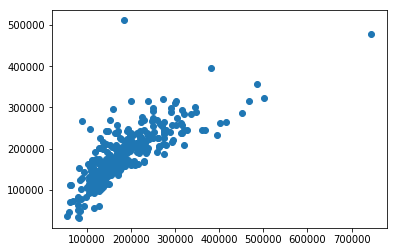

In [0]:
# define train and test sets
x = df[NameList]
y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y)
a = StandardScaler().fit(x_train)
reg = LinearRegression()
reg.fit(a.transform(x_train),y_train)
y_test_predict = reg.predict(a.transform(x_test))
plt.scatter(y_test,y_test_predict)
plt.show()


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
df['LotAreaM_2'] = df.LotAreaM**2
df['SumFloors_2'] = df.SumFloors**2
df['GarageArea**0.5_2'] = df['GarageArea**0.5']**2
df['LotArea / (BedroomAbvGr+1)_2'] = df['LotArea / (df.BedroomAbvGr+1)']**2
df['LotArea / mean_2'] = df['LotArea / mean']**2
df['LotAreaRank_2'] = df['LotAreaRank']**2

df['LotAreaM_3'] = df.LotAreaM**3
df['SumFloors_3'] = df.SumFloors**3
df['GarageArea**0.5_3'] = df['GarageArea**0.5']**3
df['LotArea / (BedroomAbvGr+1)_3'] = df['LotArea / (df.BedroomAbvGr+1)']**3
df['LotArea / mean_3'] = df['LotArea / mean']**3
df['LotAreaRank_3'] = df['LotAreaRank']**3



AttributeError: ignored